In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns

In [2]:
import numpy as np

In [3]:
def plot_formants(input_file):
    id_f1 = []
    id_f2 = []
    id_f3 = []
    f1 = {}
    f2 = {}
    f3 = {}
    mean_f1 = []
    mean_f2 =[]
    mean_f3 = []
    with open(input_file, 'r') as f:
        for line in f:
            line = line.split('\t')
            id_f1.append((line[0], line[3]))
            id_f2.append((line[0], line[4]))
            id_f3.append((line[0], line[5]))
    id_f1 = id_f1[1:]
    id_f2 = id_f2[1:]
    id_f3 = id_f3[1:]
    
    for item in id_f1:
        if item[0] not in f1:
            f1[item[0]] = []
            f1[item[0]].append(float(item[1]))
    for v in f1.values():
        v = list(map(float, v))
        mean = round((np.mean(v)), 2)
        mean_f1.append(mean)
        
    for item in id_f2:
        if item[0] not in f2:
            f2[item[0]] = []
            f2[item[0]].append(float(item[1]))
    for v in f2.values():
        v = list(map(float, v))
        mean1 = round((np.mean(v)), 2)
        mean_f2.append(mean1)
       
       
    for item in id_f3:
        if item[0] not in f3:
            f3[item[0]] = []
            f3[item[0]].append(float(item[1]))
    for v in f3.values():
        v = list(map(float, v))
        mean2 = np.mean(v)
        mean_f3.append(mean2)
       
    #print(mean_f1[0])
    return mean_f1, mean_f2, mean_f3

In [4]:
AS1_NC = plot_formants('data_C6_NC.Table')
AS1_SSN = plot_formants('data_C6_SSN.Table')
AS1_babble = plot_formants('data_C6_babble.Table')

In [5]:
import pandas as pd

In [6]:
formants_AS1_NC = pd.DataFrame(np.column_stack([AS1_NC[0], AS1_NC[1], AS1_NC[2]]), columns=['F1', 'F2', 'F3'])
formants_AS1_SSN = pd.DataFrame(np.column_stack([AS1_SSN[0], AS1_SSN[1], AS1_SSN[2]]), columns=['F1', 'F2', 'F3'])
formants_AS1_babble = pd.DataFrame(np.column_stack([AS1_babble[0], AS1_babble[1], AS1_babble[2]]), columns=['F1', 'F2', 'F3'])

In [7]:
import matplotlib.pyplot as plt


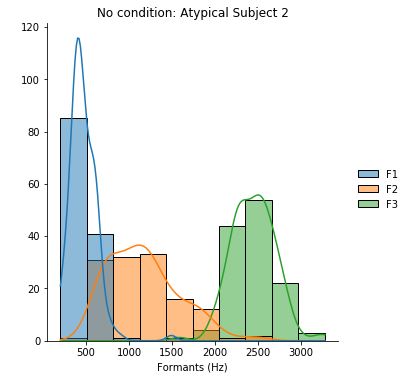

In [8]:
g = sns.displot(data=formants_AS1_NC, kde=True).set(title="No condition: Atypical Subject 2")
g.set_axis_labels("Formants (Hz)", " ")
plt.savefig('no_condition_AS2.png', dpi=400)

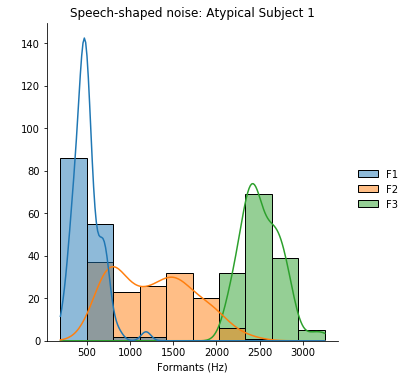

In [9]:
g = sns.displot(data=formants_AS1_SSN, kde=True).set(title="Speech-shaped noise: Atypical Subject 1")
g.set_axis_labels("Formants (Hz)", " ")

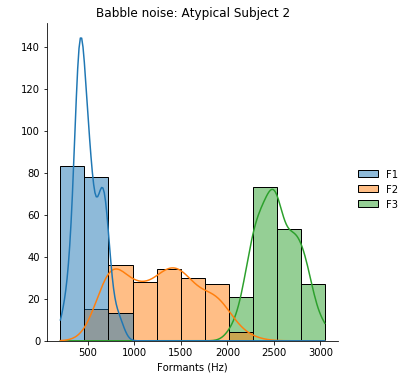

In [10]:
g = sns.displot(data=formants_AS1_babble, kde=True).set(title="Babble noise: Atypical Subject 2")
g.set_axis_labels("Formants (Hz)", " ")

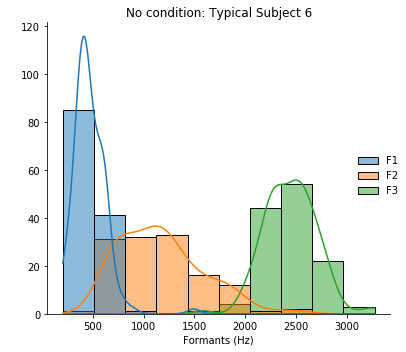

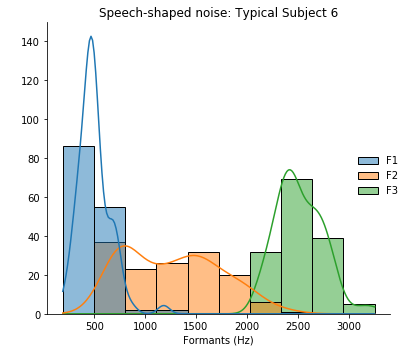

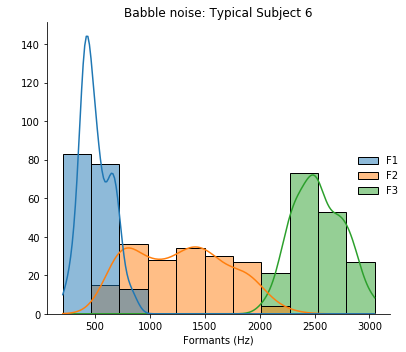

In [11]:
gNC = sns.displot(data=formants_AS1_NC, kde=True).set(title="No condition: Typical Subject 6")
gNC.set_axis_labels("Formants (Hz)", " ")
plt.tight_layout()
plt.savefig('no_condition_C6.png', dpi=400)
gSSN = sns.displot(data=formants_AS1_SSN, kde=True).set(title="Speech-shaped noise: Typical Subject 6")
gSSN.set_axis_labels("Formants (Hz)", " ")
plt.tight_layout()
plt.savefig('speech_shaped_C6.png', dpi=400)
gBbl = sns.displot(data=formants_AS1_babble, kde=True).set(title="Babble noise: Typical Subject 6")
gBbl.set_axis_labels("Formants (Hz)", " ")
plt.tight_layout()
plt.savefig('babble_C6.png', dpi=400)